# Setup

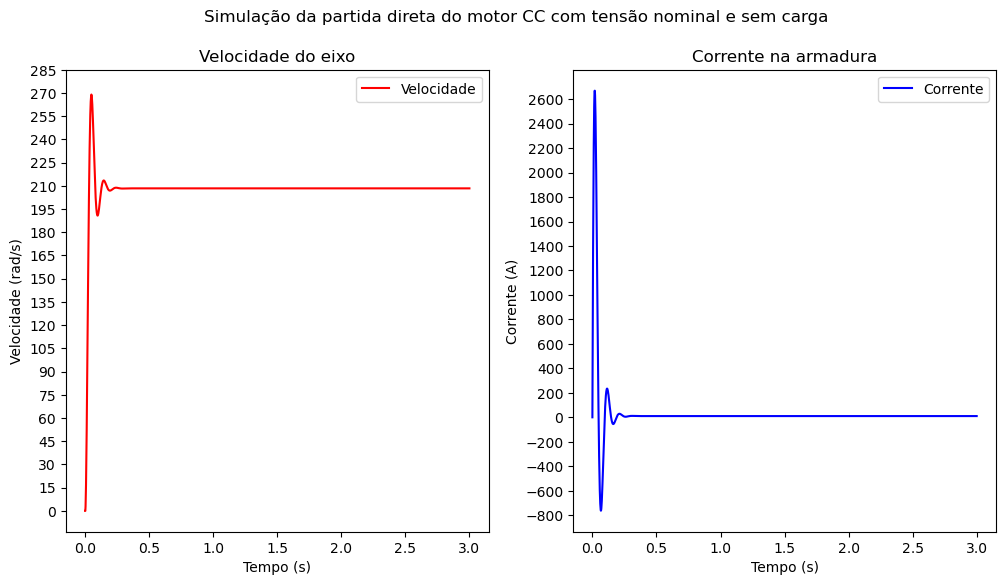

In [38]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt

# Definição dos parâmetros do motor
PMEC = 95 * 10**3
N = 0.913
VN = 400
WN = 1890 * pi / 30
RA = 0.08
J = 0.56
LA = 1.4 * 10**-3

PELE = PMEC / N
CMN = PMEC / WN
IAN = PELE / VN
KF = (VN - IAN * RA) / WN
B = (KF * IAN - CMN) / WN
TM = J / B
TE = LA / RA
T = TE / 10

A = np.array([[1 - T / TE, -KF * T / LA], [KF * T / J, 1 - T / TM]])

B = np.array([[T / LA, 0], [0, -T / J]])


def volt_vel_transfer_func(
    inputs: list[np.array],
    initial_state=np.array([[0], [0]]),
) -> tuple[float, float, float]:
    x = initial_state
    W, Ia, t = [0], [0], [0]
    tempo = 0
    N = len(inputs)  # Número de iterações

    for i in range(N):
        # Calculando as saídas e armazenando-as
        u = inputs[i]
        x = A.dot(x) + B.dot(u)

        Ia.append(x[0].item())
        W.append(x[1].item())

        # Incrementando e armazenando o tempo de simulação
        tempo += T
        t.append(tempo)

    return W, Ia, t


def show_velocity_and_current(
    inputs=[np.array([[VN], [0]]) for _ in range(int(3 / T))]
):
    # Mostrando os gráficos de velocidade e corrente
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    fig.suptitle(
        "Simulação da partida direta do motor CC com tensão nominal e sem carga"
    )

    W, Ia, t = volt_vel_transfer_func(inputs)

    # Plotting the velocity
    ax1.plot(t, W, color="r")
    ax1.set_title("Velocidade do eixo")
    ax1.set_xlabel("Tempo (s)")
    ax1.set_ylabel("Velocidade (rad/s)")
    ax1.set_yticks(np.arange(min(W), max(W) + 20, 15))
    ax1.legend(["Velocidade"])

    # Plotting the current
    ax2.plot(t, Ia, color="b")
    ax2.set_title("Corrente na armadura")
    ax2.set_xlabel("Tempo (s)")
    ax2.set_ylabel("Corrente (A)")
    ax2.set_yticks(np.arange(-800, 2800, 200))
    ax2.legend(["Corrente"])

    plt.show()


show_velocity_and_current()

[0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0

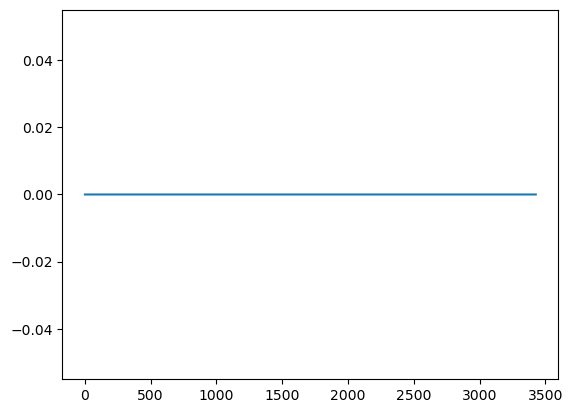

In [46]:
# Parâmetros do controlador PID
Kp = 1  # Ganho proporcional
Ki = 0  # Ganho integral
Kd = 0 # Ganho derivativo

# Período de amostragem
Ts = T

# Variáveis de estado
x1 = 0  # Integral do erro
x2 = 0  # Erro atual

referencia = np.ones(int(5/T)) * WN
saida = [0]
corrente = [0]

# Loop de controle
for k in range(int(3/T)):
    # Medir o erro (e[k] = r[k] - y[k])

    e = referencia[k] - saida[k]
    e=0
    # Atualizar as variáveis de estado
    x1_next = x1 + Ts * x2
    x2_next = x2 + Ts * e
    
    # Calcular a saída do controlador
    u = Ki * x1_next + Kp * x2_next + Kd * (e - x2) / Ts

    # Aplicar a ação de controle ao sistema
    inputs = [np.array([[u],[0]])]
    initial_state = np.array([[corrente[k]],[saida[k]]])
    W, Ia, t = volt_vel_transfer_func(inputs, initial_state)
    corrente += Ia
    saida += W
    
    # Atualizar as variáveis de estado para o próximo passo
    x1, x2 = x1_next, x2_next

print(saida)
plt.plot(saida)

In [47]:
%pip install control


   ---------------------------------------- 0.0/549.6 kB ? eta -:--:--
   ------------------- -------------------- 262.1/549.6 kB ? eta -:--:--
   ---------------------------------------- 549.6/549.6 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


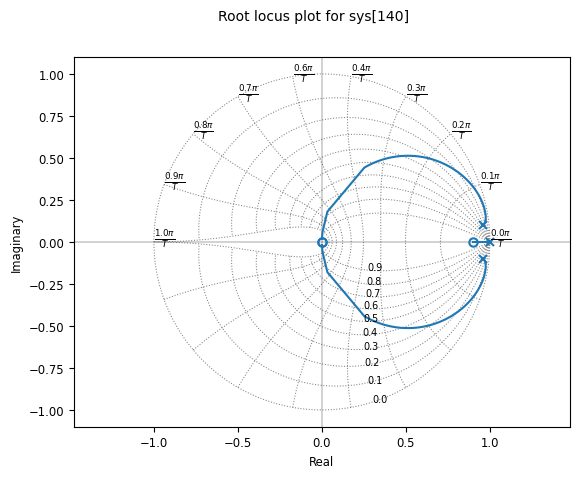

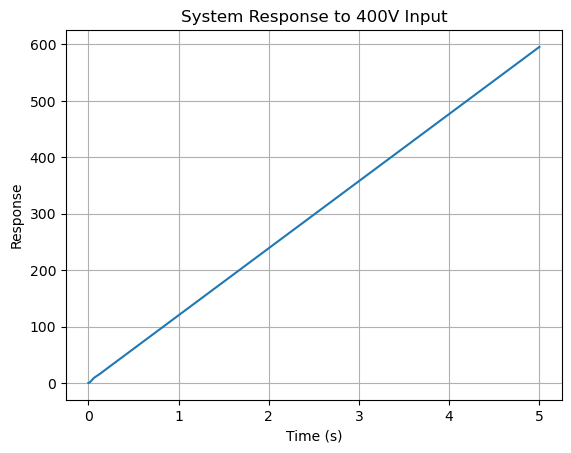

In [17]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

# Define the sampling time
T = 0.00175

# Define the transfer functions
num_gpz = [0.0058540, 0, 0]
den_gpz = [1, -1.9224928, 0.9337476]
gpz = ctrl.TransferFunction(num_gpz, den_gpz, T)

a = 0.9
b = a
gpid = ctrl.TransferFunction([1, -(a + b), a * b], [1, -1, 0], T)

gpi = 0.01 * ctrl.TransferFunction([1, -a], [1, -1], T)


# Compute the closed-loop transfer function
qz = gpz * gpi

# Root locus plot
ctrl.rlocus(qz);
# Simulate system response to a 400V input and 0 load
time = np.arange(0, 5, T) 
T_out, yout = ctrl.forced_response(qz, T=time, U=400*np.ones_like(time))


# Plot the response
plt.figure()
plt.plot(T_out, yout)
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('System Response to 400V Input')
plt.grid()
plt.show()